# Why Time Series Analysis?
In this analysis we have only one variable: **Time**
We can analyse this time series data in order to extract meaningful statistics and other characteristics.

# What is Time Series?
A time series is a set of observations taken at specified times usually at equal intervals.
It is used to predict the future values based on the previous observed values.
* Business Forecasting: Your past is going to define your future
* Understand past behaviour
* Plan future: Analyze the past and forecast the future
* Evaluate current accomplishment:  you have predicted to sell 100 choco, did you do that?

# Components of Time Series
* Trend:  movemeent higher-lower over a specific time (sales up first year, then lower, that was the trend, happens some time then disappears)
* Seasonality: repeats during a time period (christmas) (or ice cream sales)
* Irregularity: niose. erratic in nature. (like when a disaster happens, no one could have predicted)
* Cyclic: repeating up and down movements. no fixed patterns. keep on repeating and hard to predict

# When Not To Use Time Series Analysis
1. When all values are constant (each month same coffee sales)
2. Values in the form of functions (sin x, cos x) [no point of applying TSA if you have a formula]

# What is Stationarity
TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
It should have:
1. Constant Mean (average)
2. Constant variance (distance from the mean)
3. Autocovariance that does not depend on time 
Then our series is Stationarity

# Tests to Check Stationarity
1. Rolling Statistics (Plot the moving average or moving variance and see if it vaies with time, more of a visual technique)
2. ADCF Test (Null hypothesis is that the TS is nonstationary. The test results comprise of a Test Statistic and some Critical values. If the Test statistic is less than the critical value we reject the hypothesis

# What is ARIMA Model
One of the best models to work with Time Series
Combination of AR + MA: Auto Regressive + Moving Average
I: integration part
Parameters:
P: autoregressive lags
Q: moving average
d: order of differentiation

# Demo: Forcast the demand (passenger traffic) in Airplanes.
The data is classified in date/time and the passengers travelling per month.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 6

In [10]:
dataset = pd.read_csv("Time Series Analysis/AirPassengers.csv")

# parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataSet = dataset.set_index(['Month'])

In [11]:
from datetime import datetime
indexedDataSet.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


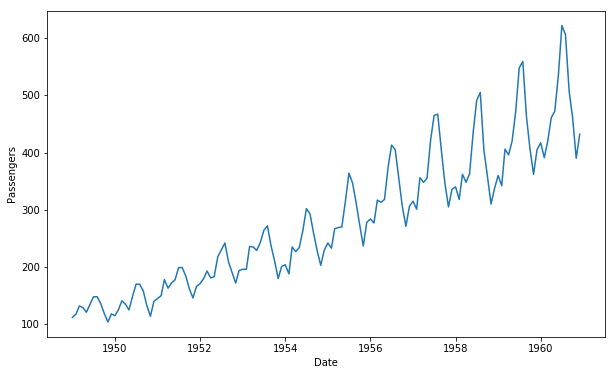

In [13]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(indexedDataSet)

The mean is not constant. The mean is not stationary.

In [15]:
# Determining rolling statistics
rolmean = indexedDataSet.rolling(window=12).mean()
rolmean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [16]:
rolstd = indexedDataSet.rolling(window=12).std()
rolstd

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


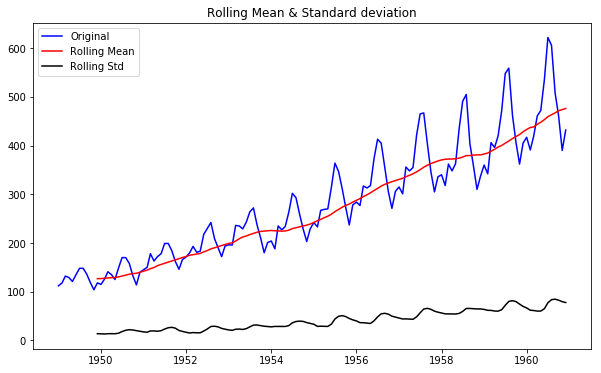

In [17]:
# plot rolling statistics
orig = plt.plot(indexedDataSet, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard deviation')
plt.show(block=False)

In [19]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
dftest = adfuller(indexedDataSet['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


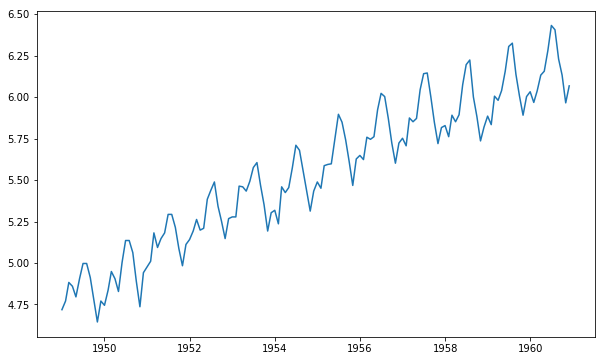

In [22]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataSet)
plt.plot(indexedDataset_logScale)

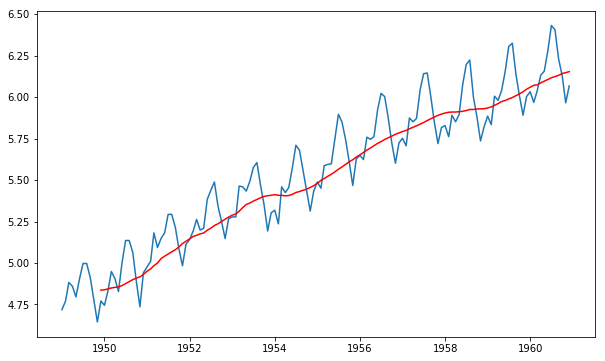

In [23]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [25]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [30]:
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label= 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

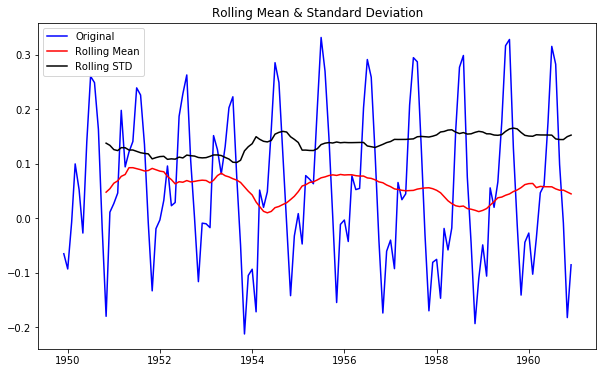

Results of Dickey-Fuller Test:
Test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationary(datasetLogScaleMinusMovingAverage)

In [32]:
# things became better now. P value is less. 

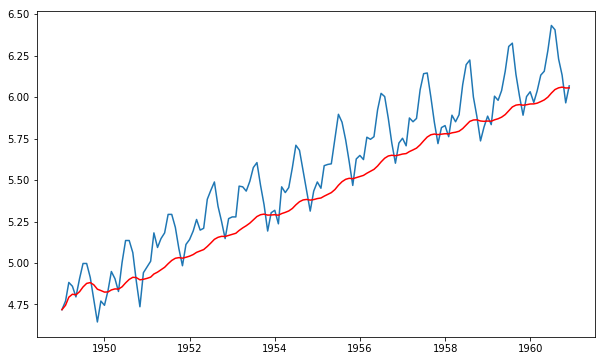

In [33]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

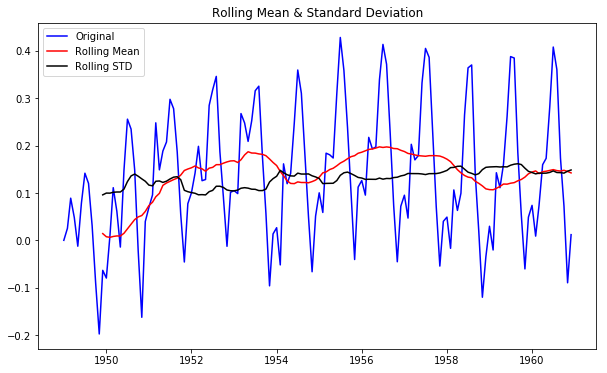

Results of Dickey-Fuller Test:
Test Statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

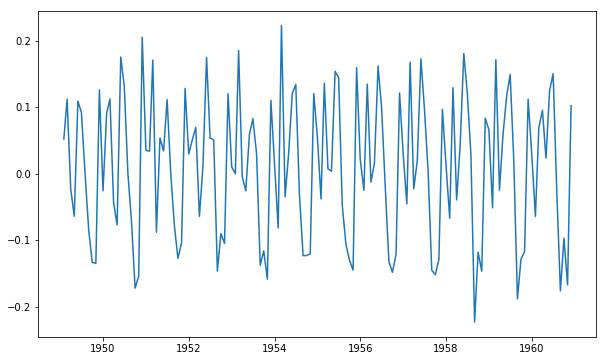

In [35]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

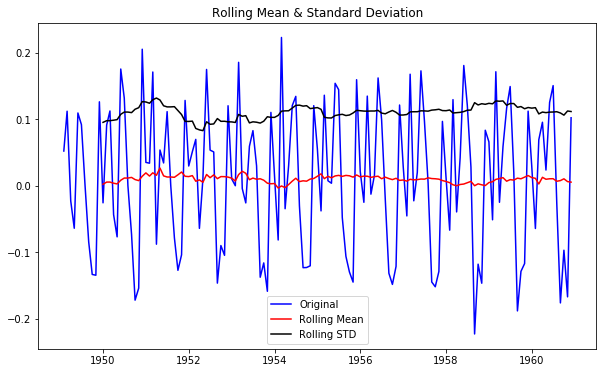

Results of Dickey-Fuller Test:
Test Statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [36]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

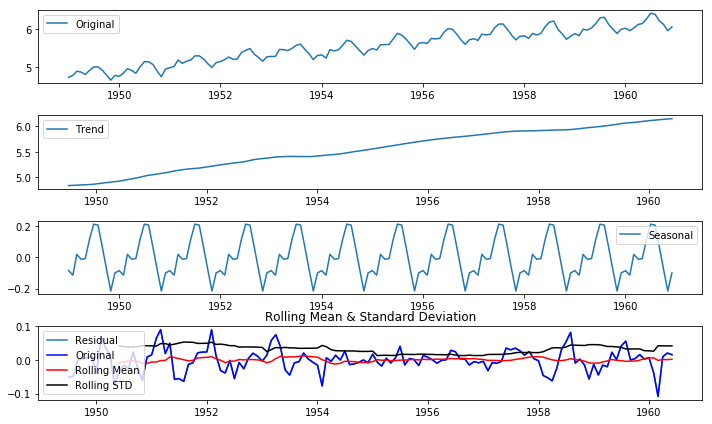

Results of Dickey-Fuller Test:
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

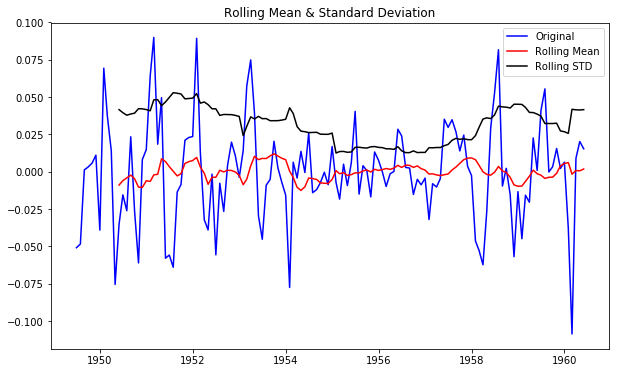

Results of Dickey-Fuller Test:
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [40]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

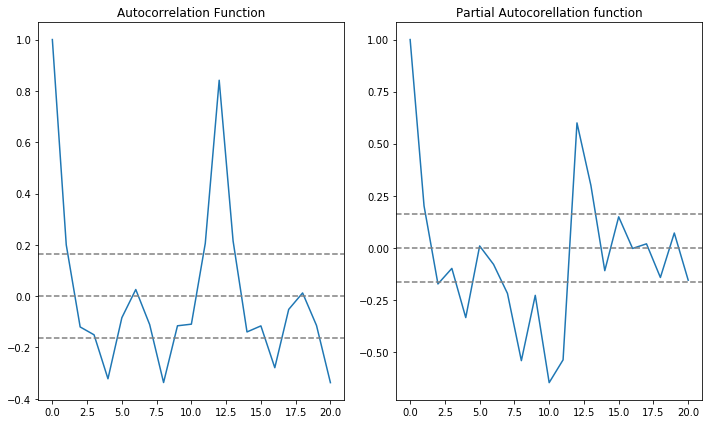

In [43]:
# ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

# plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorellation function')
plt.tight_layout()

In [44]:
# to use calculate p and q


Plotting AR model


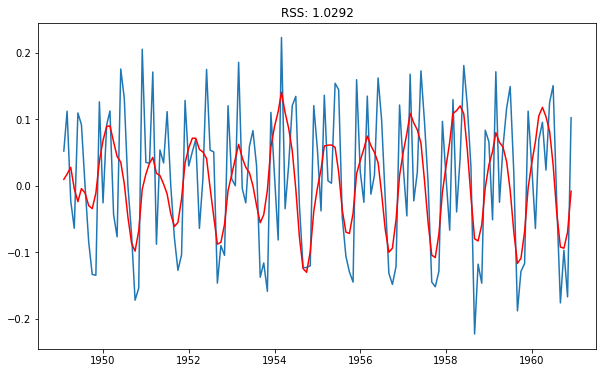

In [46]:
from statsmodels.tsa.arima_model import ARIMA
#AR model p, d,q
model = ARIMA(indexedDataset_logScale, order=(2,1,2)) # p,d,q
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')
# greated RSS the worse it is

Plotting AR model


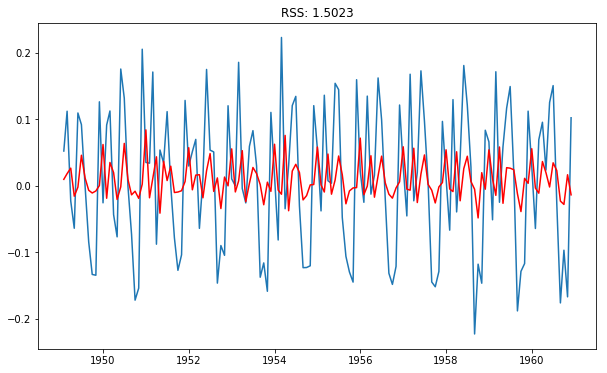

In [48]:
from statsmodels.tsa.arima_model import ARIMA
#MR model p, d,q
model = ARIMA(indexedDataset_logScale, order=(2,1,0)) # p,d,q
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')
# greated RSS the worse it is

Plotting AR model


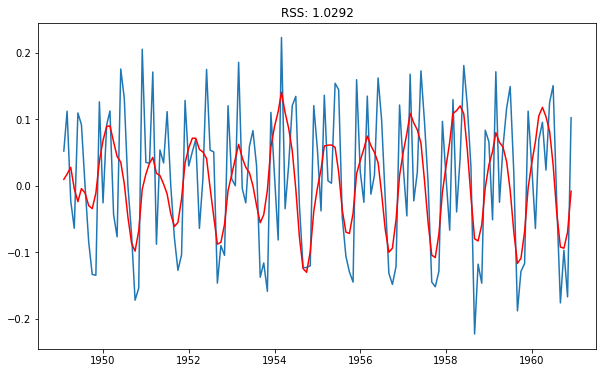

In [50]:
from statsmodels.tsa.arima_model import ARIMA
#MR model p, d,q
model = ARIMA(indexedDataset_logScale, order=(2,1,2)) # p,d,q
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')
# greated RSS the worse it is

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [56]:
# convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [59]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

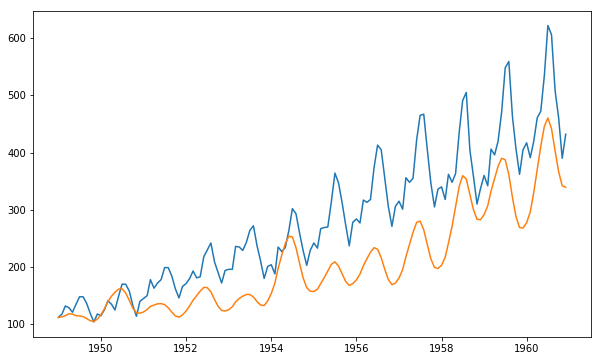

In [60]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataSet)
plt.plot(predictions_ARIMA)

In [62]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


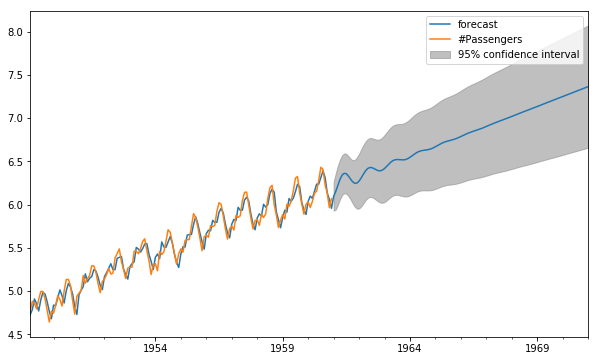

In [64]:
results_ARIMA.plot_predict(1, 264)
x = results_ARIMA.forecast(steps=120)

In [65]:
x[1]

array([0.08384711, 0.10749461, 0.11568694, 0.11702775, 0.11703497,
       0.11744017, 0.1176225 , 0.11778713, 0.12024164, 0.12736047,
       0.13870969, 0.15118807, 0.16157831, 0.16834414, 0.17177349,
       0.17312001, 0.17358751, 0.17385477, 0.17430235, 0.17543349,
       0.17788166, 0.18195742, 0.18726241, 0.1928342 , 0.19769274,
       0.2013067 , 0.20369086, 0.20519863, 0.20625298, 0.20721027,
       0.20836999, 0.21000355, 0.21229773, 0.21524509, 0.21860212,
       0.22198291, 0.225031  , 0.22755331, 0.22954843, 0.23114834,
       0.23253861, 0.23390569, 0.23541345, 0.23718347, 0.23926573,
       0.24161574, 0.24410409, 0.24656396, 0.24885296, 0.2508967 ,
       0.25269774, 0.25431668, 0.25584352, 0.25737268, 0.25898429,
       0.26072889, 0.26261588, 0.2646113 , 0.2666494 , 0.26865523,
       0.27056891, 0.2723614 , 0.27403745, 0.27562817, 0.27717872,
       0.2787357 , 0.28033634, 0.28200061, 0.28372726, 0.28549554,
       0.28727255, 0.2890239 , 0.29072383, 0.29236129, 0.29394